**Outline**

* Maximum Likelihood Estimation
    * Example: General Nonlinear Regression Model with Normal Errors
    * Summary of Steps in General MLE
    * Model Fitting and Illustration of the Likelihood Function
    * R commands for fitting learning curve example
        * [using the general optimizer nlm()](#nlm)
            * Using Fisher's Information matrix to get the standard error of the parameters
        * [using nls()](#nls)
* Boostrapping
    * [R commands for bootstrapping parameter SEs/CIs for the manufacturing learning curve](#ci_parameter)
    * [R commands for bootstrapping response CIs for the manufacturing learning curve](#ci_prediction)
    * [Bootstrapping Prediction Intervals (PIs) for the Response](#pi_prediction)
    
    

## Maximum Likelihood Estimation

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of a statistical model given observations, by finding the parameter values that maximize the likelihood.

In other words, We change the parameter in order to get the maximum output value of the likelihood function. The parameter that give us the maximum value is the maximum likelihood estimator.

### General Nonlinear Regression Model with Normal Errors

For example, if we assume a case when we want to fit a General Nonlinear Regression Model with Normal Errors, i.e.,

$$Y_i = g(x_i,\theta) + \varepsilon_i$$

with error distribution: $\varepsilon_i \text{~} NID(0,\alpha^2)$

We do it by first assuming a marginal distribution of each $Y_i$ given the $x_i$'s. Since we assume that our errors are independently normally distributed, our $Y_i$ will be 
$$Y_i  \text{~ NID}(\mu_i,\alpha^2)$$

with $\mu_i = g(x_i,\theta)$

Therefore, for each $Y_i$, the marginal pdf of $Y_i$ will be 
$$f(y_i; \theta, \alpha) = \frac{1}{\sqrt{2\pi\alpha}}exp\Big(-\frac{1}{2\alpha^2}(y_i-\mu_i)^2  \Big)$$

The overall joint pdf using all the Y_i's will be 
$$f(Y; \theta, \alpha) = \prod_{i=1}^{n}f(y_i; \theta, \alpha) = \frac{1}{(2\pi)^{n/2}\alpha^n}exp\Big(-\frac{1}{2\alpha^2}\sum_{i=1}^{n}(y_i-\mu_i)^2  \Big)$$

If we treat the joint pdf as a function of $\theta$ given all the $x_i$'s, then it is a likelihood function. More specifically, the output of the function is the likelihood of us having these kinds of $x_i$'s. We want to get the maximum value of the function by changing our parameter, which is $\theta$.

### Summary of Steps in General MLE

* Write out the form of the statistical model that you are using to represent the data
* Find the marginal distribution of each individual observation Yi (for regression problems the xi's  are not treated as random, so you only need to find the marginal distribution of the Yi's given the xi's)
* From the marginal distributions in step (2), find the joint distribution f(Y; θ) of  the entire set of data Y
* If tractable, find an analytical expression for the θ that maximizes the likelihood f(Y; θ). Otherwise, use optimization software to minimize −log f(Y; θ)
* The MLE of θ is the minimizer in step (4), and the Hessian can be used to assess statistical uncertainty (next topic)


**Model Fitting and Illustration of the Likelihood Function**

In [104]:
#######Illustration of car purchase data and likelihood function############
CAR<-read.table("Data_for_Lecture_Examples/Car.csv",sep=",",header=TRUE)
head(CAR)
glm1 <- glm(y ~ ., family = binomial(link="logit"), data = CAR)
summary(glm1)

y,income,car_age
0,32,3
0,45,2
1,60,2
0,53,1
0,25,4
1,68,1



Call:
glm(formula = y ~ ., family = binomial(link = "logit"), data = CAR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6189  -0.8949  -0.5880   0.9653   2.0846  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -4.73931    2.10195  -2.255   0.0242 *
income       0.06773    0.02806   2.414   0.0158 *
car_age      0.59863    0.39007   1.535   0.1249  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 44.987  on 32  degrees of freedom
Residual deviance: 36.690  on 30  degrees of freedom
AIC: 42.69

Number of Fisher Scoring iterations: 4


In [23]:
p_hat <- predict(glm1, type="response")
head(data.frame(CAR, p_hat=round(p_hat,3)))

y,income,car_age,p_hat
0,32,3,0.315
0,45,2,0.379
1,60,2,0.628
0,53,1,0.366
0,25,4,0.343
1,68,1,0.614


### <a id="nlm">R commands for fitting learning curve example using the general optimizer nlm()</a>

In [31]:
# Read Data
MLC<-read.table("Data_for_Lecture_Examples/MLC.csv",sep=",",header=TRUE)
x1<-MLC$Location;x2<-MLC$Week;y<-MLC$Efficiency

# Write out the form of the statistical model that you are using to represent the data
fn <- function(p) {yhat<-p[1]+p[2]*x1+p[4]*exp(p[3]*x2); sum((y-yhat)^2)} 

# use optimization software to minimize −log f(Y; θ)
out<-nlm(fn,p=c(1,0,-.5,-.1),hessian=TRUE)

# parameter estimates
theta<-out$estimate  
theta

[1]  1.01559833 -0.04726672 -0.13479550 -0.55244246

In [36]:
out

60.00000,30.000000,-36.26400,14.748867
30.00000,30.000000,-18.13200,7.374434
-36.26400,-18.132000,40.49897,-14.735919
14.74887,7.374434,-14.73592,9.173963


* **minimum**: the value of the estimated minimum of f
* **estimate**: parameter estimates
* **hessian**: In mathematics, the Hessian matrix or Hessian is a square matrix of second-order partial derivatives of a scalar-valued function

**MSE**

$MSE = \frac{SSE}{(n-p)}$

* p: # predictors, including constant
* n: # observations
* SSE: the value of the estimated minimum of f, where f is the nonlinear least squares.

In [41]:
###we will use the following later, for finding SEs and CIs#######
MSE<-out$minimum/(length(y) - length(theta))  #estimate of the error variance
MSE

[1] 0.0001266416

**Standard Error**

We can get the standard error by calculating the inverse of the hessian matrix divided by 2 $\hat{\sigma}$, where $\hat{\sigma}= MSE$

Fisher information matrix = hessian matrix divided by 2 $\hat{\sigma}$

* Fisher informatiom matrix capture how much information we get for the theta’s from log-likelihood function.
* the smaller the variance we have for theta, the more informatino we get; the more negative the curvture of the thetha on the likelihood function
* When calculating likelihood function, we want the result to be “the higher the better”. so, we get the curvature of the theta’s by taking the hessian matrix and then take a negative sign of it to make it “the higher the better”.
* It turns out that “under fairly general conditions” for large n, the MLE of theta is approximately multivariate normal, $\theta \approx N(\theta, I^{-1}(\theta))$. and using some derivation, the fisher info matrix is the same as covariance of theta.

In [42]:
# get observed fisher information matrix
InfoMat<-out$hessian/2/MSE  

# get the inverse of the information matrix
CovTheta<-solve(InfoMat)

#standard errors of parameter estimates is the diagonal of the covariance matrix
SE<-sqrt(diag(CovTheta))  

CovTheta
SE

1.363897e-05,-8.442776e-06,7.036036e-06,-3.838706e-06
-8.442776e-06,1.688555e-05,-4.827373e-17,-3.747765e-16
7.036036e-06,-4.827742e-17,2.030714e-05,2.130713e-05
-3.838706e-06,-3.747776e-16,2.130713e-05,6.800551e-05


[1] 0.003693097 0.004109203 0.004506345 0.008246545

### <a id="nls">Using nls package to do the same thing</a>

In [35]:
MLC<-read.table("Data_for_Lecture_Examples/MLC.csv",sep=",",header=TRUE)
x1<-MLC$Location;x2<-MLC$Week;y<-MLC$Efficiency
fn2 <- function(x1,x2,p) p[1]+p[2]*x1+p[4]*exp(p[3]*x2)
out2<-nls(y~fn2(x1,x2,p),start=list(p=c(1,0,-.5,-.3)),trace=TRUE)
summary(out2)

0.8979755 :   1.0  0.0 -0.5 -0.3
0.2919703 :   0.99629945 -0.01181667 -0.11983079 -0.29040977
0.08048641 :   1.00599314 -0.02954166 -0.13205311 -0.42020261
0.003302903 :   1.01565632 -0.04726667 -0.13536186 -0.55220066
0.003292692 :   1.01558444 -0.04726667 -0.13483295 -0.55248177
0.003292683 :   1.01559746 -0.04726667 -0.13479803 -0.55244510
0.003292683 :   1.01559830 -0.04726667 -0.13479561 -0.55244257



Formula: y ~ fn2(x1, x2, p)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
p1  1.015598   0.003672  276.60  < 2e-16 ***
p2 -0.047267   0.004109  -11.50 1.06e-11 ***
p3 -0.134796   0.004360  -30.92  < 2e-16 ***
p4 -0.552443   0.008157  -67.72  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01125 on 26 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 7.552e-06


The standard error of the estimate is probably calculated by the inverse of the fisher information matrix. 

In [103]:
logLik(out2)

'log Lik.' 94.19059 (df=5)

# Boostrapping

Hypothetically, if we knew the form of the population distribution, we could consider using simulation to draw many random samples (each of size n) from the population and calculate a different $\hat{\theta}$ for each sample.  We could construct a histogram of all the $\hat{\theta}$'s and take their sample standard deviation to be an estimate of SE($\hat{\theta}$). But what if we do not know the form of the population distribution?

Draw a "bootstrap" sample as a random sample of the same size n from the original sample of n observations (with replacement), and calculate a     for the bootstrap sample. Repeat a large number of times, each time drawing another bootstrap sample (of size n) and calculating another    for that sample. Then construct a histogram of all the    's, take their sample standard deviation to be an estimate of SE($\hat{\theta}$), etc. 

### <a id='ci_parameter'>R commands for bootstrapping parameter SEs/CIs for the manufacturing learning curve</a>

In [43]:
library(boot)   #need to load the boot package

# read data
MLC<-read.table("Data_for_Lecture_Examples/MLC.csv",sep=",",header=TRUE)

# parameter estimates
MLCfit<-function(Z,i,theta0) {
   Zboot<-Z[i,]
   x1<-Zboot[[1]];x2<-Zboot[[2]];y<-Zboot[[3]]
   fn <- function(p) {yhat<-p[1]+p[2]*x1+p[4]*exp(p[3]*x2); sum((y-yhat)^2)} 
   out<-nlm(fn,p=theta0)
   theta<-out$estimate}  

# do bootstrapping to estimate the standard error for the parameters
MLCboot<-boot(MLC, MLCfit, R=5000, theta0=c(1,-.05,-.14,-.55))

# get the covariance matrix
CovTheta<-cov(MLCboot$t)

# get the standard error from the diagonal of the matrix
SE<-sqrt(diag(CovTheta))

In [59]:
MLCboot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = MLC, statistic = MLCfit, R = 5000, theta0 = c(1, 
    -0.05, -0.14, -0.55))


Bootstrap Statistics :
       original        bias    std. error
t1*  1.01559674  0.0001995506 0.002905378
t2* -0.04726666 -0.0001427573 0.003930713
t3* -0.13479841  0.0002868197 0.005744071
t4* -0.55244515  0.0012287296 0.010942128

* **original** the estimate from the nlm function.
* **bias**: the difference between the mean of the bootstrapping sample to the original estimate.
* **std. error**: the standard error calculated by bootstrapping.

In [48]:
CovTheta

8.441221e-06,-8.082415e-06,5.595709e-06,1.889070e-06
-8.082415e-06,1.545050e-05,-2.960669e-07,-8.565682e-07
5.595709e-06,-2.960669e-07,3.299435e-05,4.399854e-05
1.889070e-06,-8.565682e-07,4.399854e-05,1.197302e-04


We can manually calculate the SE by taking the square root of the diagonal of the covariance matrix.

In [50]:
SE

[1] 0.002905378 0.003930713 0.005744071 0.010942128

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 5000 bootstrap replicates

CALL : 
boot.ci(boot.out = MLCboot, conf = c(0.9, 0.95, 0.99), type = c("norm", 
    "basic"), index = 1)

Intervals : 
Level      Normal              Basic         
90%   ( 1.011,  1.020 )   ( 1.011,  1.020 )   
95%   ( 1.010,  1.021 )   ( 1.010,  1.022 )   
99%   ( 1.008,  1.023 )   ( 1.009,  1.024 )  
Calculations and Intervals on Original Scale

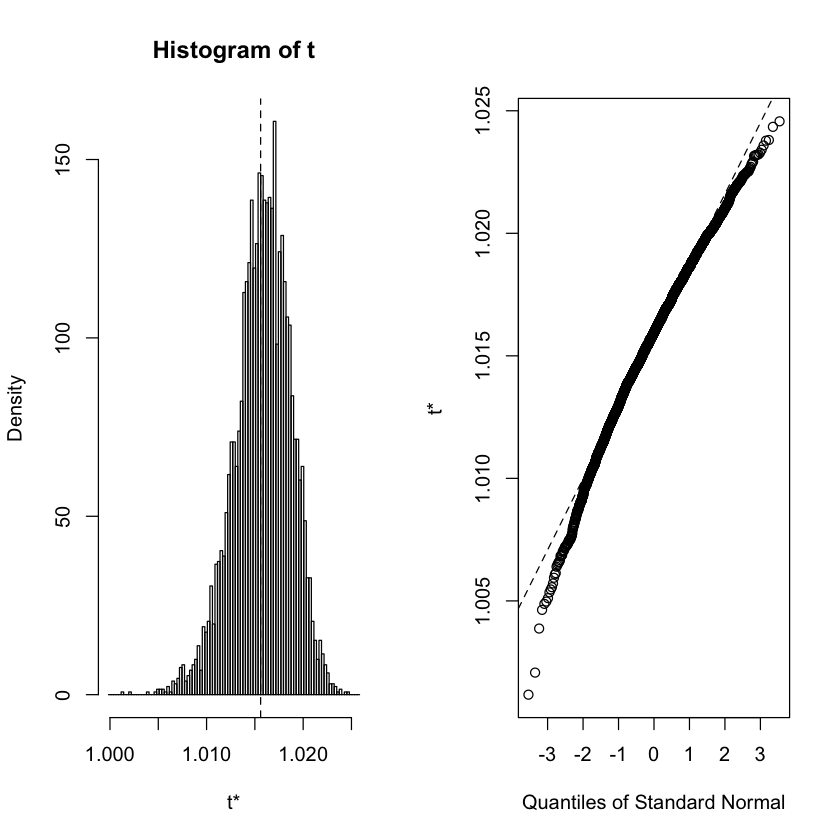

In [47]:
plot(MLCboot,index=1)  #index=i calculates results for ith parameter
boot.ci(MLCboot,conf=c(.9,.95,.99),index=1,type=c("norm","basic"))

**Calculating the Crude CI (Normal CI)**

**Normal CI**: $\hat{\theta} \pm SE(\hat{\theta}) - bias$

we want to minus the bias since we want to take the bias into account when we build the CI using the SE calculated from bootstrapping.

In [57]:
1.01559674-1.96*0.002905378-0.0001995506

[1] 1.009703

In [58]:
1.01559674+1.96*0.002905378-0.0001995506

[1] 1.021092

**When to Use Which Method for Calculating SEs?**

* use the Fisher info matrix
    * If n is large enough to invoke asymptotics, and you want an expression for the SEs (which provides useful insight into the quality of the data)
* use bootstrapping
    * If n is not large enough to invoke asymptotics (the more complex the model, the larger the required n)
    * In certain cases in which the conditions other than n required for the asymptotic results are not met (somewhat rare)
    * If there is no underlying probabilistic model for the data (and hence no likelihood or MLEs), in which case the Fisher info matrix is irrelevant
    * If the model is nonparametric, in which case the Fisher info matrix is irrelevant
    * For SEs for the predicted response CIs or PIs with complex nonlinear models
   

### <a id="ci_prediction">R commands for bootstrapping response CIs for the manufacturing learning curve</a>


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = MLC, statistic = MLCfit, R = 5000, theta0 = c(1, 
    -0.05, -0.14, -0.55), x_pred = c(1, 15))


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8951899 -0.000250642 0.005095601

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 5000 bootstrap replicates

CALL : 
boot.ci(boot.out = MLCboot_ci, conf = c(0.9, 0.95, 0.99), type = c("norm", 
    "basic"))

Intervals : 
Level      Normal              Basic         
90%   ( 0.8871,  0.9038 )   ( 0.8870,  0.9036 )   
95%   ( 0.8855,  0.9054 )   ( 0.8851,  0.9052 )   
99%   ( 0.8823,  0.9086 )   ( 0.8820,  0.9090 )  
Calculations and Intervals on Original Scale

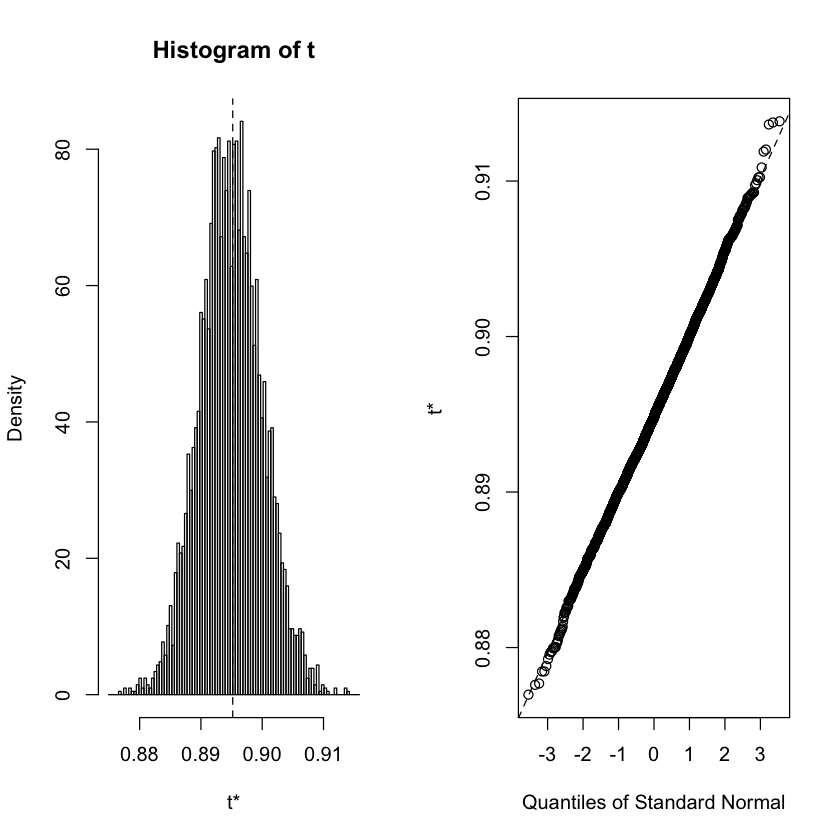

In [87]:
library(boot)   #need to load the boot package

# parameter estimates
MLCfit<-function(Z,i,theta0,x_pred) {
   Zboot<-Z[i,]
   x1<-Zboot[[1]];x2<-Zboot[[2]];y<-Zboot[[3]]
   fn <- function(p) {yhat<-p[1]+p[2]*x1+p[4]*exp(p[3]*x2); sum((y-yhat)^2)} 
   out<-nlm(fn,p=theta0)
   theta<-out$estimate 
   y_pred<- theta[1]+theta[2]*x_pred[1]+theta[4]*exp(theta[3]*x_pred[2])} #predicted response

# do bootstrapping to estimate the confidence interval on the predicted response
MLCboot_ci<-boot(MLC, MLCfit, R=5000, theta0=c(1,-.05,-.14,-.55), x_pred=c(1,15))
MLCboot_ci

# get the variance
VarYhat<-var(MLCboot_ci$t)

# get the standard error from the diagonal of the matrix
SEYhat<-sqrt(VarYhat)

# plot out
plot(MLCboot_ci)  
boot.ci(MLCboot_ci,conf=c(.9,.95,.99),type=c("norm","basic"))

In [88]:
MLCboot_ci


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = MLC, statistic = MLCfit, R = 5000, theta0 = c(1, 
    -0.05, -0.14, -0.55), x_pred = c(1, 15))


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8951899 -0.000250642 0.005095601

We can see that the 95% reflected confidence interval for the new observation x_pred=c(1,15) is (0.8851,  0.9050).

## <a id="pi_prediction">Bootstrapping Prediction Intervals (PIs) for the Response</a>

In statistical inference, specifically predictive inference, a prediction interval is an estimate of an interval in which future observations will fall, with a certain probability, given what has already been observed.

Suppose that I'm fitting a simple linear regression model with no intercept.  The model is $y=βx+ϵ$ with all the standard assumptions on $ϵ$.  In particular, the expected value of $ϵ$ is zero.

Given a new value of x which I'll call x0, there are two things I can estimate:

* The average value of y when x=x0.
* The value of y in a specific observation when x=x0.

The confidence interval is measuring how much uncertainty there is in the first estimate, whereas the prediction interval is measuring how much uncertainty there is in the second estimate.  As I get more data, there's less uncertainty in both quantities.  The difference is that the confidence interval will eventually collapse to a single point in the limit, whereas the prediction interval will never become that narrow.  That's because there's more information about the average in a larger sample, but there isn't more information about any single observation.

PI on Y*: $g(x*, \hat{\theta}) \pm z_{\alpha/2}\sqrt{SE[g(x*, \hat{\theta})]^2+ \hat{\alpha}^2}$

Simple Method

In [98]:
# Get the predicted response
Yhat0 = MLCboot_ci$t0
Yhat0

# get the bootstrapping predicted response.
Yhatboot = MLCboot_ci$t

# get the MSE
# MSE = nlm_result$minimum/(length(y)-length(nlm_theta)) 

# get the wider standard error
SEY = sqrt(var(Yhatboot)+MSE)

# calculate the prediction interval
pi = c(Yhat0-qnorm(0.975)*SEY, Yhat0+qnorm(0.975)*SEY)
pi

[1] 0.8951899

[1] 0.8709777 0.9194021

Complex Method to calculate the PI
```
> Yhat0<-MLCboot$t0
> Yhatboot<-MLCboot$t
> e<-rnorm(nrow(Yhatboot), mean=0, sd=sqrt(MSE)) 
> Yboot<-Yhatboot+e
> SEY<-sqrt(var(Yboot))
> Yquant<-quantile(Yboot,prob=c(.025,.975))
> L<-2*Yhat0-Yquant[2]
> U<-2*Yhat0-Yquant[1]
```

Reference
* [Quora: What is the difference between prediction and confidence intervals?](https://www.quora.com/What-is-the-difference-between-prediction-and-confidence-intervals)
